# **Importing Libraries**
---

In [55]:
# Utility libraries
import ipaddress


# Data manipulation and handling
import numpy as np
import pandas as pd


# Visualization libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Resampling
from sklearn.utils import resample


# Imbalanced data handling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Machine learning and preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# **Loading The Dataset**
---

In [56]:
df = pd.read_csv("./DATASET/FULL-DATASET/fullDF.csv", low_memory=False)

In [57]:
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,...,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,...,,1,1,2,6,1,1,1,NaN,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,...,,12,11,8,9,6,1,6,NaN,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,...,,37,37,26,26,26,13,37,Generic,1


In [58]:
print("Dataset Dimensions (rows, columns):", df.shape)

Dataset Dimensions (rows, columns): (2540043, 49)


# **Basic Statistiscal info about the datasets**
---

In [59]:
print("Dataframe Info:")

df.describe().T

Dataframe Info:


,count,mean,std,min,25%,50%,75%,max
dur,2540043.0,6.587925e-01,1.392494e+01,0.000000e+00,1.037000e-03,1.586100e-02,2.145650e-01,8.786638e+03
sbytes,2540043.0,4.339589e+03,5.640604e+04,0.000000e+00,2.000000e+02,1.470000e+03,3.182000e+03,1.435577e+07
dbytes,2540043.0,3.642760e+04,1.610962e+05,0.000000e+00,1.780000e+02,1.820000e+03,1.489400e+04,1.465753e+07
sttl,2540043.0,6.278202e+01,7.462281e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,2540043.0,3.076681e+01,4.285092e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,2540043.0,5.163917e+00,2.251709e+01,0.000000e+00,0.000000e+00,3.000000e+00,7.000000e+00,5.319000e+03
dloss,2540043.0,1.632944e+01,5.659479e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,5.507000e+03
Sload,2540043.0,3.695650e+07,1.186044e+08,0.000000e+00,1.353955e+05,5.893038e+05,2.039923e+06,5.988000e+09
Dload,2540043.0,2.450860e+06,4.224865e+06,0.000000e+00,1.191580e+04,5.893179e+05,2.925945e+06,1.287619e+08
Spkts,2540043.0,3.328882e+01,7.628393e+01,0.000000e+00,2.000000e+00,1.200000e+01,4.400000e+01,1.064600e+04


- **General Observations:**
    - **Null or Missing Values**: Features like ct_flw_http_mthd and is_ftp_login have fewer counts (e.g., 1,191,900 and 1,110,166), indicating potential missing values. [ *Looking at the statistical information of the dataset we can see that "ct_flw_http_mthd" has values for only "1191900" records and similarly "is_ftp_login" has only "1110166" records.* ]

    - **Wide Range of Values**: Features, such as dur, sbytes, and Sload, have extremely high maximum values compared to their medians, which suggests the presence of outliers.

    - **Imbalance in Labels**: The mean value for the Label is 0.126, indicating that only about 12.6% of the data points belong to the positive class (an anomaly). This means that the target class is heavily imbalanced, which will require resampling during model training.

In [60]:
column_data_types = df.dtypes

# Numerical and categorical columns
numerical_count = 0
categorical_count = 0


for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1


print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [61]:
df.describe(include='object')

,srcip,sport,dstip,dsport,proto,state,service,ct_ftp_cmd,attack_cat
count,2540043,2540043,2540043,2540043,2540043,2540043,2540043,2540043,321283
unique,43,64600,47,64630,135,16,13,9,13
top,59.166.0.4,1043,149.171.126.3,53,tcp,FIN,-,,Generic
freq,197959,220322,197771,798967,1495071,1478686,1246395,1429877,215481


- **Observations:**
    - So we have 9 features as a string datatypes means they hold Object values in our dataframe, which are namely 'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat'

    - The **attack_cat** column has fewer rows **(321,283)**, suggesting missing or null values in a large portion of the data for this feature. The top category is *Generic*, appearing in *215,481* rows.

    - **Service**: The - (likely indicating missing or unspecified service) occurs most often, in 1,246,395 rows

# **Data Preprocessing for EDA**
---

# **Removing Leading and Trailing Spcaes From Objects:**

In [62]:
# Striping spaces from all string values in columns of type 'object'
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(include=['object']).apply(
    lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x)
)



# and striping spaces from column names
df.columns = df.columns.str.strip()




df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

# **Checking for Missing Data**
---

We will check if there are any missing values in datasets.


In [63]:
# Total Numbers and percentage of missing values

print("Missing values in Training Data:")

missing_count = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

print(missing_data)


Missing values in Training Data:
                  Missing Count  Missing Percentage (%)
srcip                         0                0.000000
sport                         0                0.000000
dstip                         0                0.000000
dsport                        0                0.000000
proto                         0                0.000000
state                         0                0.000000
dur                           0                0.000000
sbytes                        0                0.000000
dbytes                        0                0.000000
sttl                          0                0.000000
dttl                          0                0.000000
sloss                         0                0.000000
dloss                         0                0.000000
service                       0                0.000000
Sload                         0                0.000000
Dload                         0                0.000000
Spkts          

- **Observations:**
    - **Columns with Missing Values:**
        - **ct_flw_http_mthd**: Has 1,348,143 missing entries, accounting for 53.08% of the total rows.
        - **is_ftp_login**: Has 1,429,877 missing entries, accounting for 56.29% of the total rows.
        - **attack_cat**: The column with the highest percentage of missing data, with 87.35% missing entries (2,218,760 rows).

        The high proportion of missing data in attack_cat (87.35%) suggests that this critical column may not reliably inform the attack classification unless substantial imputation or targeted filtering is performed.

**Replacing the unknown value(-) with 'others' in 'state' and 'service'**

In [64]:
df['state'] = df['state'].replace('-', 'others')
df['service'] = df['service'].replace('-', 'others')

In [65]:
df['attack_cat'].value_counts()

attack_cat
Generic           215481
Exploits           44525
Fuzzers            24246
DoS                16353
Reconnaissance     13987
Analysis            2677
Backdoor            1795
Shellcode           1511
Backdoors            534
Worms                174
Name: count, dtype: int64

- **Observations:**
    - There is a clear imbalance in the attack categories. The Generic category alone represents the majority of the labeled data.

In [66]:
# Since 'Backdoors' and 'Backdoor' are the same, we will merge them:
df['attack_cat'] = df['attack_cat'].apply(lambda item: 'Backdoor' if item =='Backdoors' else item)

In [67]:
df['attack_cat'].value_counts()

attack_cat
Generic           215481
Exploits           44525
Fuzzers            24246
DoS                16353
Reconnaissance     13987
Analysis            2677
Backdoor            2329
Shellcode           1511
Worms                174
Name: count, dtype: int64

**Since for those entries in the **attack_cat** which are missing, it is indicating that no attacked occured for those transaction. Those were the Normal Transaction, free of any attacks. So the missing values in the **attack_cat** can be filled with **Normal** as their new value indication non-attack**

In [68]:
# Filling missing values in attack_cat with 'Normal'
if 'attack_cat' in df.columns:
    df['attack_cat'] = df['attack_cat'].fillna('Normal')
    
print(len(df[df['attack_cat'] == 'Normal']))

2218760


In [69]:
# Dropping the 'ct_flw_http_mthd' column
if 'ct_flw_http_mthd' in df.columns:
    df = df.drop(columns=['ct_flw_http_mthd'])

# **Balancing The *attack_cat* (Normal) Data for easy Computation as per resources**
---

In [70]:
# New distribution
print("Original attack category distribution:")
df['attack_cat'].value_counts()

Original attack category distribution:


attack_cat
Normal            2218760
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: count, dtype: int64

**Balancing the dataset by downsampling the 'Normal' category and combining it with the 'Non-Normal'(attacked transactions) data**

In [71]:
# Separating the 'Normal' and 'Non-Normal'(indicating attacked transactions) categories
normal_data = df[df['attack_cat'] == 'Normal']
non_normal_data = df[df['attack_cat'] != 'Normal']


# Downsample the 'Normal' category
normal_undersampled = resample(normal_data, 
                               replace=False, 
                               n_samples=400000, 
                               random_state=42)  


# Combine the downsampled 'Normal' data with the non-'Normal' data
df_resampled = pd.concat([normal_undersampled, non_normal_data])


# Shuffling the dataframe
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)


# Handle any missing values if needed
if 'is_ftp_login' in df_resampled.columns:
    df_resampled['is_ftp_login'] = df_resampled['is_ftp_login'].fillna(0.0)


In [72]:
# New distribution
print("New attack category distribution:")
df_resampled['attack_cat'].value_counts()

New attack category distribution:


attack_cat
Normal            400000
Generic           215481
Exploits           44525
Fuzzers            24246
DoS                16353
Reconnaissance     13987
Analysis            2677
Backdoor            2329
Shellcode           1511
Worms                174
Name: count, dtype: int64

In [73]:
print("New size of the dataset after dropping missing values and re-sampling:", df_resampled.shape)

New size of the dataset after dropping missing values and re-sampling: (721283, 48)


# **Checking for Redundant Data**
---

Check for duplicate rows in the resampled datasets


In [74]:
print("Duplicate Rows In The Data:", df_resampled.duplicated().sum())

# Drop duplicate rows
df_resampled = df_resampled.drop_duplicates()

print("Remaining Duplicate Rows:", df_resampled.duplicated().sum())

Duplicate Rows In The Data: 248929
Remaining Duplicate Rows: 0


In [75]:
print("New size of the Dataset after Dropping Duplicate Rows:", df_resampled.shape)

New size of the Dataset after Dropping Duplicate Rows: (472354, 48)


# **Detecting Outliers**
---

We can look at the statistical summary of the data, and for each numerical column, we can check for unusually high or low values by identifying those beyond a certain range.


In [76]:
# print("Statistical Summary of Training Data:")
# display(df_resampled.describe().transpose())

# **Checking Unique Values Of Attributes**


In [77]:
cols = df_resampled.columns

for column in cols:
    print('Unique values of', column, 
          'with dtype', df_resampled[column].dtype, 
          'have total values', df_resampled[column].nunique(), '->\n',  df_resampled[column].unique())

    print()
    print('.'*100)
    print()

Unique values of srcip with dtype object have total values 42 ->
 ['175.45.176.3' '149.171.126.18' '59.166.0.6' '59.166.0.9' '59.166.0.4'
 '59.166.0.3' '59.166.0.5' '59.166.0.1' '59.166.0.8' '59.166.0.7'
 '59.166.0.2' '175.45.176.2' '175.45.176.1' '175.45.176.0'
 '149.171.126.10' '59.166.0.0' '149.171.126.15' '149.171.126.14'
 '10.40.85.1' '149.171.126.12' '10.40.182.6' '10.40.85.30' '10.40.170.2'
 '149.171.126.1' '149.171.126.4' '10.40.182.1' '149.171.126.7'
 '10.40.85.10' '10.40.182.3' '149.171.126.13' '149.171.126.9'
 '149.171.126.8' '149.171.126.6' '149.171.126.2' '149.171.126.5'
 '149.171.126.3' '149.171.126.0' '192.168.241.243' '149.171.126.11'
 '149.171.126.17' '149.171.126.16' '149.171.126.19']

....................................................................................................

Unique values of sport with dtype object have total values 64440 ->
 ['1043' '58086' '41318' ... '17429' '26151' '16871']

..............................................................

- **Inference:**
    - In column 'is_ftp_login' unique values are [0. 1. 2. 4.] which is not correct because according to given NB15_features.csv this column is a binary column


# **Handling is_ftp_login**
---

In [78]:
def convert_to_binary(df_resampled, column):
    df_resampled[column] = (df_resampled[column] > 0).astype(int)
    return df_resampled


# Converting to binary
column = 'is_ftp_login'
df_resampled = convert_to_binary(df_resampled, column)


df_resampled['is_ftp_login'].unique()


array([0, 1])

# **Visualizing Class Imbalance**
---

**We will check for class imbalance using the 'Label' column, which represents whether a transaction is normal or an attack.**

**Additionally, we'll inspect the 'attack_cat' column to check the distribution of attack types.**

Class distribution in the Dataset ('Label' column):
        Count  Percentage (%)
Label                        
0      372711       78.905016
1       99643       21.094984


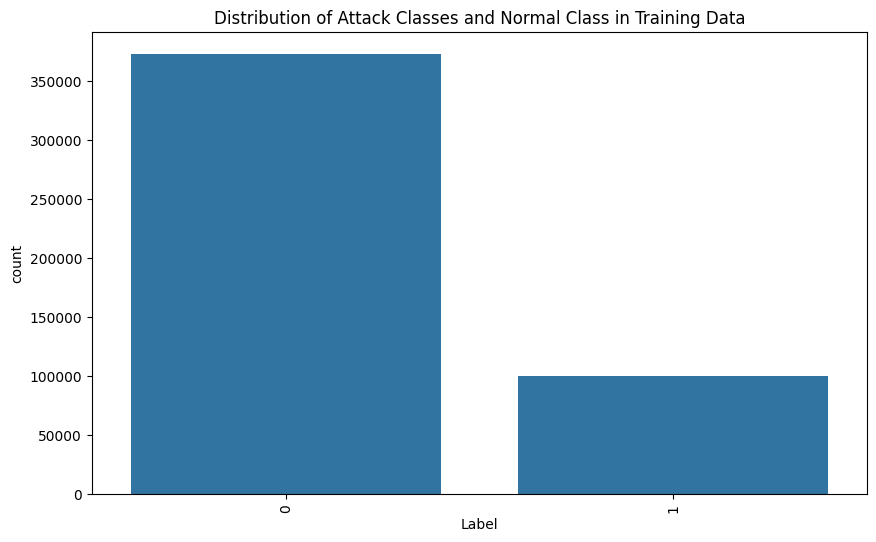

In [79]:
print("Class distribution in the Dataset ('Label' column):")

# Total value of each target class
lebel_counts = df_resampled['Label'].value_counts()

# Percentage of each target class
lebel_percentages = df_resampled['Label'].value_counts(normalize=True) * 100


lebel_distribution = pd.DataFrame(
    {
        'Count': lebel_counts,
        'Percentage (%)': lebel_percentages
    }
)


print(lebel_distribution)


plt.figure(figsize=(10, 6))

sns.countplot(data=df_resampled, 
              x='Label',
              order=df_resampled['Label'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Distribution of Attack Classes and Normal Class in Training Data')
plt.show()

In [80]:
fig = px.pie(
    lebel_counts,
    values=lebel_counts.values,
    names=lebel_counts.index,
    title='Distribution of Label'
)

fig.show()

Now we will check for Imbalances Between Different Attack Classes

If the label column contains both normal and attack classes, we will want to check how many samples are available for each specific attack class.

This can help identify if some attack classes are underrepresented or overrepresented.



Attack categories distribution('attack_cat' column):
                  Count  Percentage (%)
attack_cat                             
Normal          2218760       87.351277
Generic          215481        8.483360
Exploits          44525        1.752923
Fuzzers           24246        0.954551
DoS               16353        0.643808
Reconnaissance    13987        0.550660
Analysis           2677        0.105392
Backdoor           2329        0.091691
Shellcode          1511        0.059487
Worms               174        0.006850


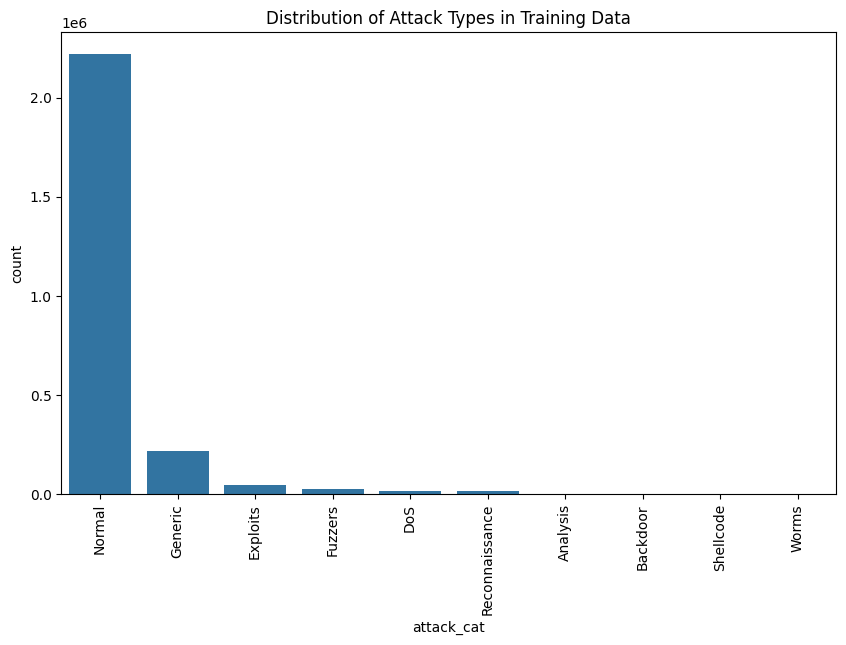

In [81]:
print("\nAttack categories distribution('attack_cat' column):")

attack_counts = df['attack_cat'].value_counts()
attack_percentages = df['attack_cat'].value_counts(normalize=True) * 100


attack_distribution = pd.DataFrame(
    {
        'Count': attack_counts,
        'Percentage (%)': attack_percentages
    }
)

print(attack_distribution)

plt.figure(figsize=(10, 6))

sns.countplot(data=df, 
              x='attack_cat',
              order=df['attack_cat'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.show()

# **Most Used Service By Attack Category**
---

In [82]:
df_attacks_cat_services = df_resampled[(df_resampled['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'service']).size().reset_index(name='Count')

df_attacks_cat_services.reset_index()

,index,attack_cat,service,Count
0,0,Analysis,http,392
1,1,Analysis,others,1786
2,2,Analysis,smtp,6
3,3,Backdoor,ftp,7
4,4,Backdoor,http,88
...,...,...,...,...
59,59,Reconnaissance,smtp,7
60,60,Reconnaissance,snmp,80
61,61,Shellcode,others,1511
62,62,Worms,http,145


In [87]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


# List of attack categories
categories = ['Analysis',
              'Backdoor',
              'DoS',
              'Exploits',
              'Fuzzers',
              'Generic',
              'Reconnaissance',
              'Shellcode',
              'Worms'
              ]


# Row and Column positions for each plot
positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]


# Creating a bar plot for each one
for i, category in enumerate(categories):
    # Filtering the dataframe for each attack category
    df_filtered = df_attacks_cat_services[df_attacks_cat_services['attack_cat'] == category]

    fig.add_trace(go.Bar(x=df_filtered['service'],
                         y=df_filtered['Count'],
                         name=category,
                         marker_color=px.colors.qualitative.Plotly[i]
                         ),
                  row=positions[i][0],
                  col=positions[i][1]
                  )


fig.update_layout(height=900,
                  width=900,
                  title_text="Service Counts by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

- **Observation:**

    - **High Prevalence in "Others" Category:** Across most attack categories, the "others" category consistently shows a high number of services, indicating a broad and diverse range of services involved in these attacks.

    - **HTTP Dominance:** The "http" category shows significant counts in specific attack categories like "DoS" and "Exploits," suggesting that web services are common targets for these types of attacks.

    - **Specific Attack Patterns:** Certain attack types like "Fuzzers" and "Generic" almost exclusively involve the "others" category, while categories like "http" are heavily targeted in "Exploits."

    - **Under-Utilized Services:** Categories such as "dns," "ftp," "pop3," "smtp," and "ssh" consistently have low or negligible service counts across various attack categories, indicating they are less targeted in comparison to "others" and "http."

# **Top Protocols Used By Attack Category**
----

In [85]:
df_attacks_cat_proto = df_resampled[(df_resampled['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'proto']).size().reset_index(name='Count')

In [ ]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


categories = [
    'Analysis',
    'Backdoor',
    'DoS',
    'Exploits',
    'Fuzzers',
    'Generic',
    'Reconnaissance',
    'Shellcode',
    'Worms'
]


positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]

# Create a bar plot for each one (top 5 protocols)
for i, category in enumerate(categories):
    # Filtering the dataframe for each attack category and taking the top 5 protocols
    df_filtered = df_attacks_cat_proto[df_attacks_cat_proto['attack_cat'] == category][:5]

    fig.add_trace(go.Bar(
        x=df_filtered['proto'],
        y=df_filtered['Count'],
        name=category,
        marker_color=px.colors.qualitative.Plotly[i]
    ),
        row=positions[i][0],
        col=positions[i][1]
    )


fig.update_layout(height=900,
                  width=900,
                  title_text="Top 5 Services by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

- **Observation**

    - **Prevalence of 'any' Protocol:**  The protocol "Any" is predominantly used across multiple attack categories such as Analysis, Backdoor, DoS, Exploits, Fuzzers, Generic, and Reconnaissance. This indicates that these attacks are versatile and can be executed through various protocols.

    - **Use of Certain Protocols:** In contrast, for categories like Shellcode and Worms, specific protocols (tcp and udp) are used. The high frequency of usage in Shellcode attacks (800 for both tcp and udp) suggests that these attacks may be more prevalent or intense, requiring robust detection and mitigation strategies.


# **Correlation matrix: Checking Highly Correlated Features**
---

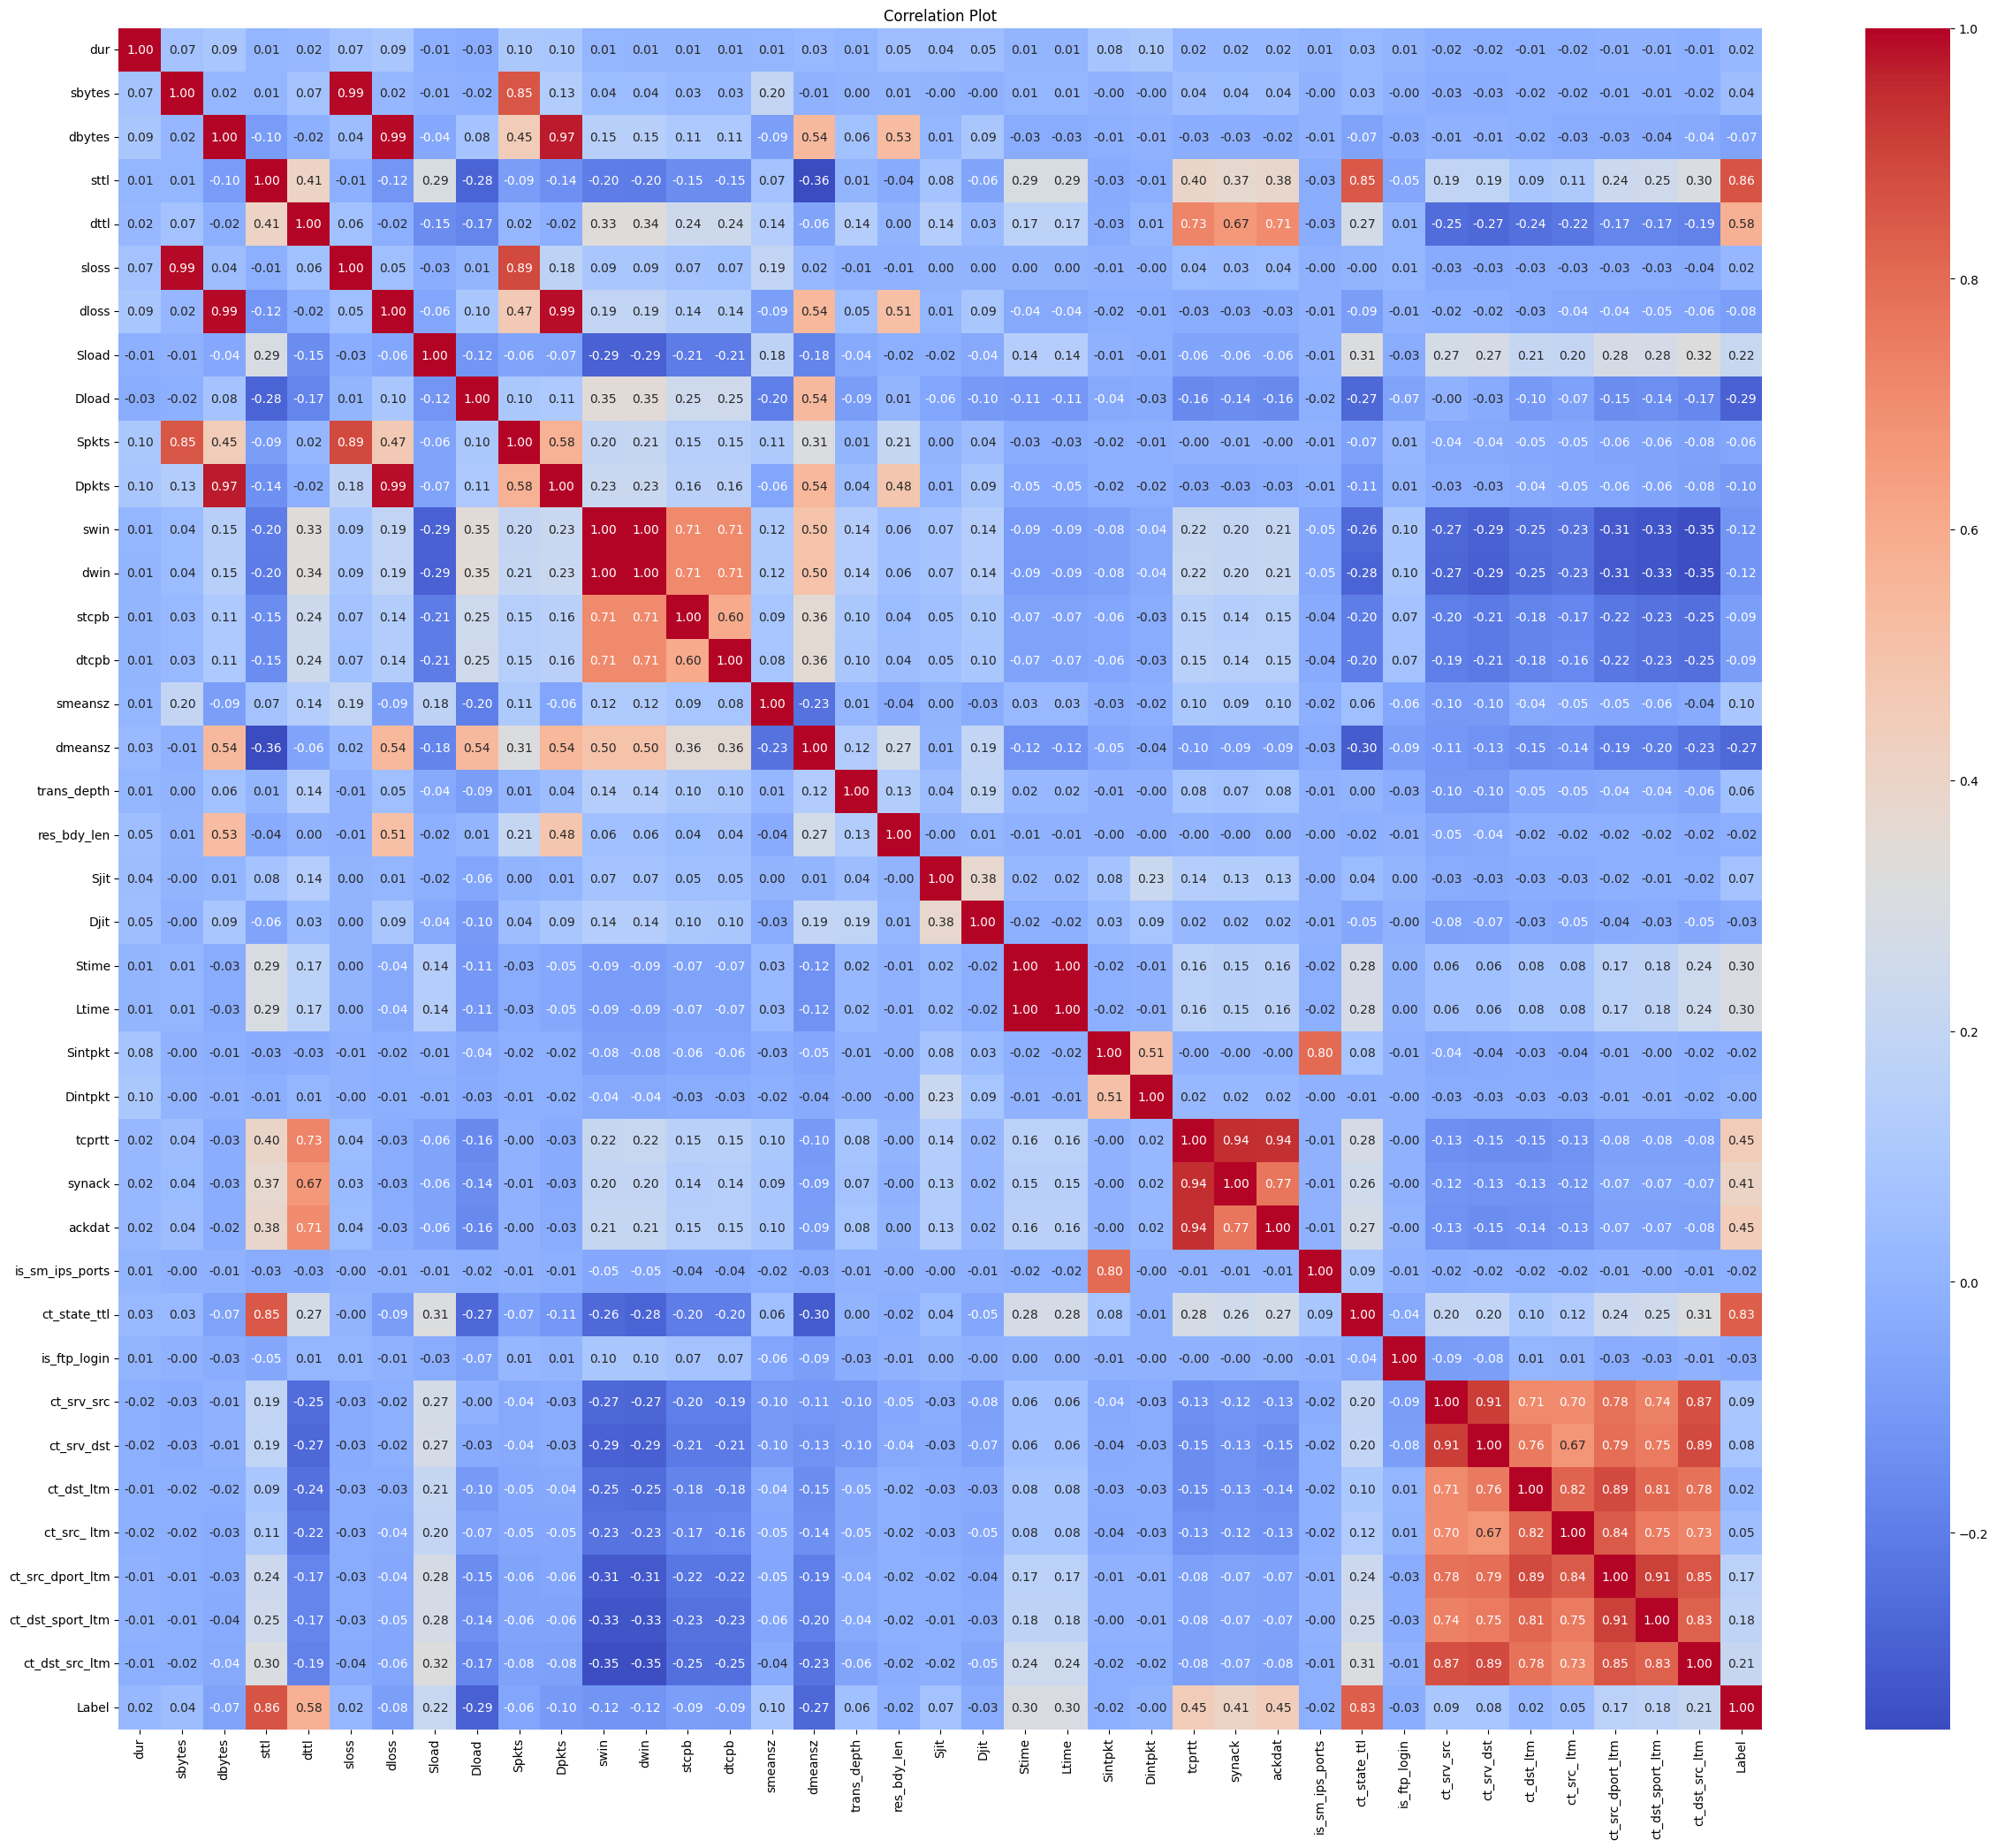

In [89]:
# Only Numeric Columns
numeric_data = df_resampled.select_dtypes(include=[float, int])

# Correlation heatmap
plt.figure(figsize=(30, 25))
plt.title("Correlation Plot")

sns.heatmap(
    numeric_data.corr(), 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f")

plt.show()

- **Observations:**

    - **Strong Positive Correlations:** "ct_srv_src" has strong positive correlations with "ct_srv_dst" (0.79) and "ct_dst_src_ltm" (0.75), "ct_dst_ltm" has strong positive correlations with "ct_srv_dst" (0.79) and "ct_dst_src_ltm" (0.75), "ct_srv_dst" has a strong positive correlation with "ct_dst_src_ltm" (0.79), "sbytes" has a strong positive correlation with "dbytes" (0.77), similarly there are others as well.

    - **Redundancy in Variables:** Variables related to service and destination counts (e.g., "ct_srv_src", "ct_srv_dst", "ct_dst_src_ltm") are highly correlated with each other, suggesting they may measure similar aspects of the data.

    - **Data Transfer Relationship:** The strong correlation between "sbytes" and "dbytes" indicates that the amount of data sent and received are closely related.

    - **Dimensionality Reduction:** Identifying which variables are redundant due to high correlation can be useful for our project.

In [93]:
# Only numeric columns
numeric_columns = df_resampled.select_dtypes(include=[np.number]).columns
numeric_data = df_resampled[numeric_columns]


# Correlation matrix
corr_matrix = numeric_data.corr()


# Highly correlated features
threshold = 0.9
high_corr_pairs = []


# Variance for each numeric column
feature_variances = numeric_data.var()


# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (corr_matrix.columns[i],
                 corr_matrix.columns[j],
                 corr_matrix.iloc[i, j],
                 feature_variances[corr_matrix.columns[i]],
                 feature_variances[corr_matrix.columns[j]]
                 )
            )


# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs,
                            columns=['Feature 1', 'Feature 2', 'Correlation', 'Variance Feature 1', 'Variance Feature 2'])



print("Highly Correlated Features with thier correlation and Variances:\n")
print(high_corr_df)

Highly Correlated Features with thier correlation and Variances:

          Feature 1         Feature 2  Correlation  Variance Feature 1  \
0             sloss            sbytes     0.989720        2.371423e+03   
1             dloss            dbytes     0.993191        3.951031e+03   
2             Dpkts            dbytes     0.972953        1.776480e+04   
3             Dpkts             dloss     0.988335        1.776480e+04   
4              dwin              swin     0.997127        1.468192e+04   
5             Ltime             Stime     1.000000        1.289011e+12   
6            synack            tcprtt     0.943481        1.076004e-03   
7            ackdat            tcprtt     0.937131        9.704949e-04   
8        ct_srv_dst        ct_srv_src     0.913103        5.719010e+01   
9  ct_dst_sport_ltm  ct_src_dport_ltm     0.908427        1.210755e+01   

   Variance Feature 2  
0        1.640295e+10  
1        3.121426e+10  
2        3.121426e+10  
3        3.951031e+03  

- **Observations:**

   1. **High Correlations**: The high correlation suggests redundancy among features.
      - 10 feature pairs exhibit correlations above the threshold (|0.9|), indicating redundancy among these features.
      - Some pairs with extremely high correlations include:
        - `sloss` and `sbytes` (0.989)
        - `dloss` and `dbytes` (0.993)
        - `dwin` and `swin` (0.997)
        - `Ltime` and `Stime` (1.000)
   
   2. **Variance of Features**:
      - Some highly correlated features, such as `sloss` vs. `sbytes` and `dloss` vs. `dbytes`, show a significant variance difference, implying potential skewed data distributions.
      - `Ltime` and `Stime` exhibit the same variance, suggesting they might be identical or highly redundant.
   
   3. **Strong Relationship Across Groups**:
      - Features related to packet sizes and bytes (`sloss`, `sbytes`, `dloss`, `dbytes`, `Dpkts`) are closely interdependent.
      - TCP timing features (`synack`, `ackdat`, `tcprtt`) also have strong correlations.
      - Connection tracking features (`ct_srv_dst`, `ct_srv_src`, `ct_src_dport_ltm`, `ct_dst_ltm`) exhibit interrelations.



- **NOTE**: We need to drop highly correlated columns to reduce multicollinearity and improve model interpretability, a strategic approach is required to select the columns that contribute most effectively to our model.

When selecting columns to keep among highly correlated pairs, we should usually **`retain the column with higher variance`** and **`drop the one with lower variance`**.


In [94]:
columns_to_drop = set()


# Correlated pair to drop
for feature1, feature2, corr_value, var_feature1, var_feature2 in high_corr_pairs:
    if var_feature1 > var_feature2:
        columns_to_drop.add(feature2)
    else:
        columns_to_drop.add(feature1)

# Columns with lower variance
df_resampled = df_resampled.drop(columns=columns_to_drop)
print("Total Number of Dropped columns:", len(columns_to_drop))
print()
print("Dropped columns are:", columns_to_drop)
print()
print()


print("Total Number of Remaining features after dropping highly correlated ones:",
      len(df_resampled.columns))
print()
print("Remaining features after dropping highly correlated ones:")
print(df_resampled.columns)

Total Number of Dropped columns: 9

Dropped columns are: {'synack', 'ackdat', 'dloss', 'Dpkts', 'ct_srv_dst', 'Ltime', 'ct_dst_sport_ltm', 'sloss', 'swin'}


Total Number of Remaining features after dropping highly correlated ones: 39

Remaining features after dropping highly correlated ones:
Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'service', 'Sload', 'Dload', 'Spkts', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_src_ltm', 'attack_cat', 'Label'],
      dtype='object')


# **Principal Component Analysis (PCA)**
---


Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that can help identify the most relevant features in a dataset, especially when dealing with high-dimensional data like intrusion detection datasets.

By projecting the data into a lower-dimensional space, PCA allows you to capture the most variance with fewer features, which can be useful for improving model performance and interpretability.


**Explained Variance**:
- Explained variance measures the amount of variance captured by each principal component in PCA.
- It indicates how much information (variance) each principal component contributes to the dataset.

**Cumulative Variance**:
- Cumulative variance is the sum of the explained variance of the principal components up to a certain point.
- It shows the total variance captured by the first 'n' principal components.
- It helps in determining the number of principal components needed to retain a desired amount of total variance in the dataset.

In [97]:
# Numeric columns
numeric_columns = df_resampled.select_dtypes(include=[np.number]).columns
numeric_data = df_resampled[numeric_columns]


# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


# Applying PCA
pca = PCA()
pca.fit(scaled_data)


# Analyzing results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


# Explained variance df
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})


explained_variance_df

,Principal Component,Explained Variance,Cumulative Variance
0,1,0.182410,0.182410
1,2,0.121222,0.303632
2,3,0.089340,0.392972
3,4,0.068013,0.460985
4,5,0.062921,0.523906
5,6,0.053626,0.577532
6,7,0.048491,0.626023
7,8,0.038471,0.664494
8,9,0.036618,0.701112
9,10,0.034073,0.735184


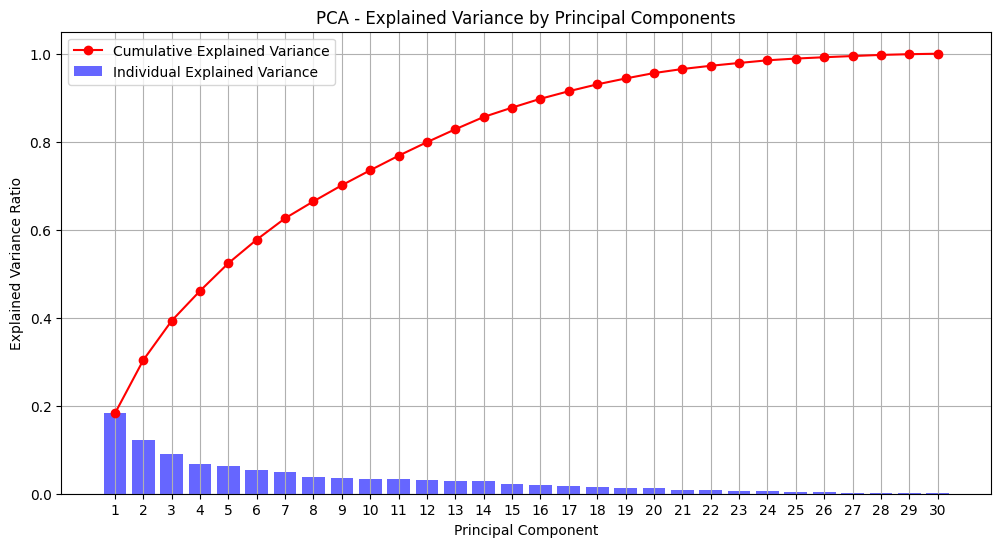

In [98]:
# Plot E. Var
plt.figure(figsize=(12, 6))


plt.bar(
    explained_variance_df['Principal Component'],
    explained_variance_df['Explained Variance'],
    alpha=0.6,
    color='b',
    label='Individual Explained Variance'
)


plt.plot(explained_variance_df['Principal Component'], 
         explained_variance_df['Cumulative Variance'],
         marker='o', 
         color='r', 
         label='Cumulative Explained Variance')


plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')


plt.xticks(np.arange(1, len(explained_variance_df) + 1))


plt.legend()
plt.grid()
plt.show()

- **Observations:**
    - **Significant Variance by Initial Components:** The first few principal components explain a large portion of the variance in the data.
        - The first 5 components capture approximately 55% of the variance.
        - The first 10 components capture about 79% of the variance.
        - To achieve over 90% variance, we'll need around 15-20 components.

    - **First Principal Component:** It explains around 20% of the total variance.

    - **Cumulative Trend:** The cumulative explained variance increases rapidly with the addition of the first few principal components and then gradually levels off.

    - **Maximizing Variance:** By the time we reach the 30th principal component, the cumulative explained variance approaches 1.0, meaning nearly all the variance in the data is accounted for by these components.



Given this analysis, we can proceed with 15/20 components for PCA, as this allows for a good balance between dimensionality reduction and the retention of information.


# **Feature Engineering**
----

In [99]:
def generate_features(df_resampled):
    # Ratios
    df_resampled['byte_ratio'] = df_resampled['sbytes'] / (df_resampled['dbytes'] + 1)
    df_resampled['load_ratio'] = df_resampled['Sload'] / (df_resampled['Dload'] + 1)
    df_resampled['jit_ratio'] = df_resampled['Sjit'] / (df_resampled['Djit'] + 1)


    # Aggregate Features
    df_resampled['total_bytes'] = df_resampled['sbytes'] + df_resampled['dbytes']
    df_resampled['total_load'] = df_resampled['Sload'] + df_resampled['Dload']
    df_resampled['total_jitter'] = df_resampled['Sjit'] + df_resampled['Djit']


    # Interaction Features
    df_resampled['byte_pkt_interaction_src'] = df_resampled['sbytes'] * df_resampled['Spkts']
    df_resampled['load_jit_interaction_src'] = df_resampled['Sload'] * df_resampled['Sjit']
    df_resampled['load_jit_interaction_dst'] = df_resampled['Dload'] * df_resampled['Djit']
    df_resampled['pkt_jit_interaction_src'] = df_resampled['Spkts'] * df_resampled['Sjit']


    # Statistical Features
    df_resampled['tcp_seq_diff'] = df_resampled['stcpb'] - df_resampled['dtcpb']



    return df_resampled


generate_features(df_resampled)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,load_ratio,jit_ratio,total_bytes,total_load,total_jitter,byte_pkt_interaction_src,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,tcp_seq_diff
0,175.45.176.3,1043,149.171.126.15,53,udp,INT,0.000009,114,0,254,...,5.066666e+07,0.000000,114,5.066666e+07,0.000000,228,0.000000e+00,0.000000e+00,0.000000,0
1,175.45.176.3,58086,149.171.126.14,179,tcp,FIN,0.636317,1506,268,254,...,6.051422e+00,21.180269,1774,1.986431e+04,3534.042336,15060,5.754869e+07,4.460245e+05,33756.645390,2351307204
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000007,264,0,60,...,1.508571e+08,0.000000,264,1.508571e+08,0.000000,528,0.000000e+00,0.000000e+00,0.000000,0
3,59.166.0.6,41318,149.171.126.4,53,udp,CON,0.001053,146,178,31,...,8.202234e-01,0.000000,324,1.230769e+06,0.000000,292,0.000000e+00,0.000000e+00,0.000000,0
4,59.166.0.9,32717,149.171.126.2,57035,tcp,FIN,0.039853,2854,31402,31,...,9.080263e-02,64.197833,34256,6.732743e+06,64.197833,131284,3.598030e+07,0.000000e+00,2953.100318,2119313877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721278,59.166.0.5,27079,149.171.126.0,6881,tcp,FIN,0.017937,1540,1644,31,...,9.298120e-01,24.331311,3184,1.336678e+06,74.469903,24640,4.668625e+07,1.370964e+06,1159.849440,2143757242
721279,59.166.0.2,18950,149.171.126.9,80,tcp,FIN,1.007003,1684,10168,31,...,1.628467e-01,1.142017,11852,8.872268e+04,16441.134235,23576,1.089191e+08,5.855851e+08,122725.818600,-985507
721280,59.166.0.5,11307,149.171.126.8,53,udp,CON,0.001099,146,178,31,...,8.202235e-01,0.000000,324,1.179254e+06,0.000000,292,0.000000e+00,0.000000e+00,0.000000,0
721281,175.45.176.0,61365,149.171.126.16,8482,udp,INT,0.000009,280,0,254,...,1.244444e+08,0.000000,280,1.244444e+08,0.000000,560,0.000000e+00,0.000000e+00,0.000000,0


# **Splitting the features in dependent and independent features**
---

In [100]:
print("Columns in the dataset:")

df_resampled.columns

Columns in the dataset:


Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'service', 'Sload', 'Dload', 'Spkts', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_src_ltm', 'attack_cat', 'Label', 'byte_ratio', 'load_ratio',
       'jit_ratio', 'total_bytes', 'total_load', 'total_jitter',
       'byte_pkt_interaction_src', 'load_jit_interaction_src',
       'load_jit_interaction_dst', 'pkt_jit_interaction_src', 'tcp_seq_diff'],
      dtype='object')

In [ ]:
# One-hot encoding 'proto' and 'service' only
columns_to_encode = ['proto', 'service']
available_columns_to_encode = [col for col in columns_to_encode if col in df_resampled.columns]



if available_columns_to_encode:
    df_resampled = pd.get_dummies(df_resampled, columns=available_columns_to_encode, drop_first=True)
    print(f"One-hot encoded columns: {available_columns_to_encode}")
else:
    print(f"Columns {columns_to_encode} not found in the dataset.")

One-hot encoded columns: ['proto', 'service']


In [103]:
# Categorical columns
categorical_columns = df_resampled.select_dtypes(include=['object']).columns
print("Categorical columns are:")

categorical_columns

Categorical columns are:


Index(['srcip', 'sport', 'dstip', 'dsport', 'state', 'ct_ftp_cmd',
       'attack_cat'],
      dtype='object')

In [104]:
# Convert IP addresses to integers
def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return 0



# LabelEncoder for encoding categorical columns
label_encoder = LabelEncoder()




for col in categorical_columns:
    if 'ip' in col.lower():  
        # IP columns to integers
        df_resampled[col] = df_resampled[col].apply(ip_to_int)
    else:  
        # Convert to string and apply label encoding
        df_resampled[col] = df_resampled[col].astype(str)
        df_resampled[col] = label_encoder.fit_transform(df_resampled[col])


print("Updated data types:")
df_resampled.dtypes


Updated data types:


srcip             int64
sport             int32
dstip             int64
dsport            int32
state             int32
                  ...  
service_radius     bool
service_smtp       bool
service_snmp       bool
service_ssh        bool
service_ssl        bool
Length: 193, dtype: object

In [105]:
label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

Label Mapping: {'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}


In [106]:
# Features and Target
x = df_resampled.drop('attack_cat', axis=1)
y = df_resampled['attack_cat']

- **Conclusion:**

    1. **Feature Set (`x`):**
        - The feature set (`x`) is created by dropping the `attack_cat` column from `df_resampled`. Ensuring that `x` contains all the independent variables (i.e., the features) necessary for predicting the target variable.

    2. **Target Variable (`y`):**
        - The target variable (`y`) is set to be the `attack_cat` column, which represents the category of the attack. This is the dependent variable we want to predict.

    3. **Data Split:**
        - The dataset is now split into `x` (input features) and `y` (target variable). 
   
    4. **Target Variable Type:**
        - Given the earlier encoding process (label encoding of the `attack_cat` column), `y` will now be an integer representation of the different attack categories. Each value in `y` corresponds to a unique category of attack, which can be used for classification tasks.

# **Applying SMOTE to balance the unbalanced data**
----

- `SMOTE` stands for `Synthetic Minority Oversampling Technique`, a statistical method for balancing the distribution of classes in a dataset.
- Now we will apply the `SMOTE` for `oversampling` and `RandomUndersampler` for `undersampling`.
- Resampling will adjust the class distribution by oversampling the minority class and undersampling the majority class. The pipeline ensures that both techniques are applied one after another in sequence.

In [ ]:
print("Before Applying Resampling:")

y.value_counts().reset_index()

Before Applying Resampling:


,attack_cat,count
0,6,372711
1,3,27599
2,5,25378
3,4,21795
4,7,13357
5,2,5665
6,0,2184
7,1,1983
8,8,1511
9,9,171


In [ ]:
# Number of samples for each class
desired_count = 35000

# Class distribution
class_counts = y.value_counts()


# Oversampling Strategy
oversample_strategy = {cls: desired_count for cls,
                       count in class_counts.items() if count < desired_count}

# SMOTE pipeline
smote = SMOTE(sampling_strategy=oversample_strategy)


# Undersampling Strategy
undersample_strategy = {cls: desired_count for cls,
                        count in class_counts.items() if count > desired_count}

# RandomUnderSampler pipeline
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)


pipeline = Pipeline(
    steps=[('smote', smote), 
           ('undersample', undersample)]
    )

# Pipeline
x_resampled, y_resampled = pipeline.fit_resample(x, y)


In [111]:
print("After Applying Resampling:")

y_resampled.value_counts().reset_index()

After Applying Resampling:


,attack_cat,count
0,0,35000
1,1,35000
2,2,35000
3,3,35000
4,4,35000
5,5,35000
6,6,35000
7,7,35000
8,8,35000
9,9,35000


In [113]:
x = x_resampled
y = y_resampled

# **Checking Feature Importance**
----

In [115]:
# Discrete features (integers and booleans are considered discrete)
discrete_features = x.dtypes.apply(lambda dtype: pd.api.types.is_integer_dtype(dtype) or pd.api.types.is_bool_dtype(dtype))

In [117]:
# The MI score
def mi_score_calculation(x, y, discrete_features):
    # Mutual information scores for classification task
    scores = mutual_info_classif(
        x, 
        y, 
        discrete_features=discrete_features
    )
    
    # DataFrame with feature names and MI scores
    df_resampled = pd.DataFrame({
        'Features': x.columns,
        'Scores': scores
    })
    
    # Sort by MI score in descending order
    df_resampled = df_resampled.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    
    return df_resampled



# MI scores calculation
mi_scores = mi_score_calculation(
    x, 
    y.astype('float64'),
    discrete_features
)


c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning:

invalid value encountered in cast

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning:

invalid value encountered in cast

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning:

invalid value encountered in cast

c:\Users\avina\AppData\Local

In [118]:
# MI scores
mi_scores.reset_index()

,index,Features,Scores
0,0,byte_pkt_interaction_src,1.614525
1,1,total_bytes,1.437987
2,2,sbytes,1.338800
3,3,byte_ratio,1.336999
4,4,dsport,1.332045
...,...,...,...
187,187,service_radius,0.000182
188,188,proto_igmp,0.000026
189,189,proto_icmp,0.000020
190,190,proto_esp,0.000000


In [120]:
# Filter features with scores less than 0.01
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]
low_score_feature_names = low_score_features['Features'].tolist()

low_score_feature_names

['proto_sctp',
 'is_ftp_login',
 'service_ssh',
 'proto_any',
 'proto_vmtp',
 'proto_rsvp',
 'proto_cftp',
 'proto_ptp',
 'proto_sun-nd',
 'proto_fire',
 'service_irc',
 'proto_scps',
 'proto_qnx',
 'proto_eigrp',
 'proto_ippc',
 'proto_iso-ip',
 'proto_mobile',
 'proto_swipe',
 'proto_ddx',
 'proto_micp',
 'proto_mhrp',
 'proto_compaq-peer',
 'proto_gre',
 'proto_sep',
 'proto_pvp',
 'proto_crudp',
 'proto_vrrp',
 'proto_pgm',
 'proto_wb-mon',
 'proto_br-sat-mon',
 'proto_ifmp',
 'proto_narp',
 'proto_ipv6',
 'proto_sps',
 'proto_ipv6-route',
 'service_snmp',
 'proto_ddp',
 'proto_sat-mon',
 'proto_pim',
 'proto_ipv6-no',
 'proto_trunk-2',
 'proto_ipcv',
 'proto_visa',
 'proto_encap',
 'proto_aris',
 'proto_il',
 'proto_dgp',
 'proto_nvp',
 'proto_igp',
 'proto_xnet',
 'proto_cphb',
 'proto_dcn',
 'proto_wb-expak',
 'proto_a/n',
 'proto_kryptolan',
 'proto_l2tp',
 'proto_emcon',
 'proto_ipv6-frag',
 'proto_leaf-1',
 'proto_ttp',
 'proto_mux',
 'proto_snp',
 'proto_skip',
 'proto_sm',


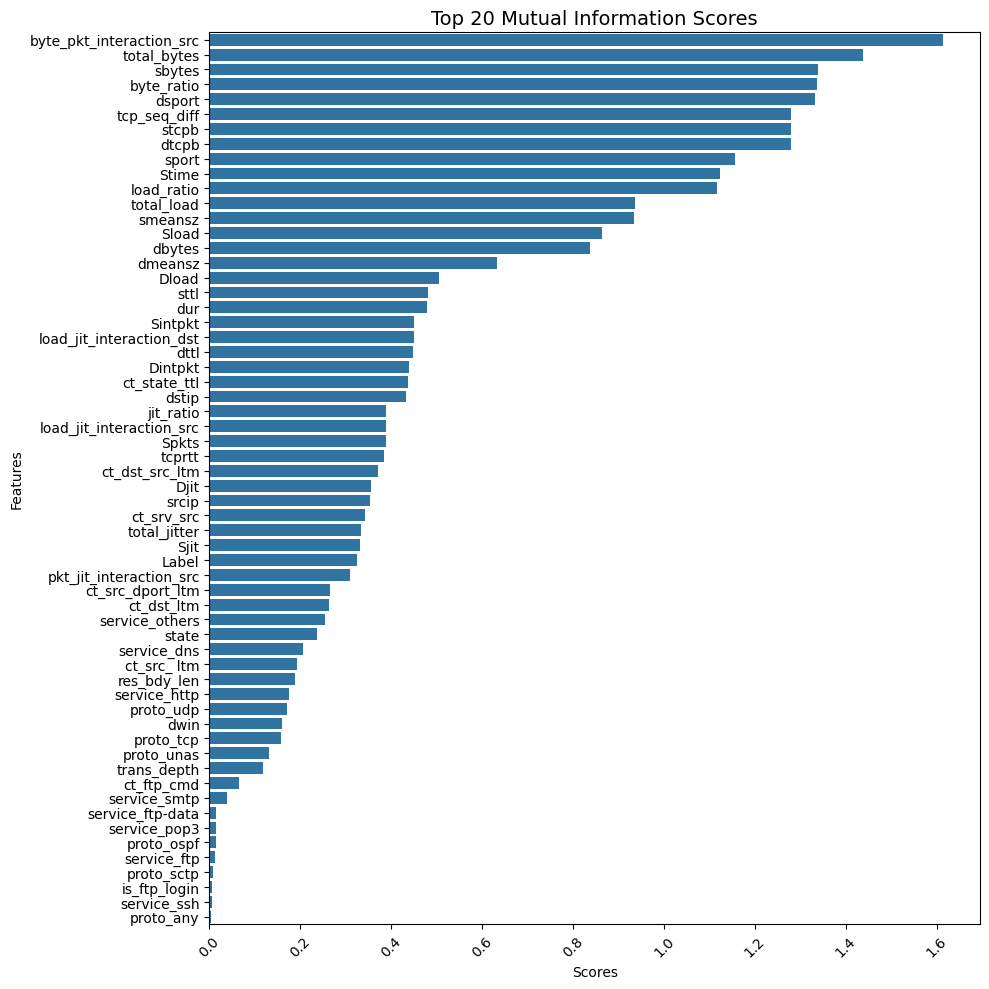

In [ ]:
# Limiting the plot to top 60 features with highest MI scores
top_n = 60
top_mi_scores = mi_scores.head(top_n)

plt.figure(figsize=(10, 10))

sns.barplot(
    x='Scores', 
    y='Features',
    data=top_mi_scores
)

plt.title("Top 60 Mutual Information Scores", fontsize=14)

plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [136]:
# Drop low-score features
x.drop(low_score_feature_names, axis=1, inplace=True)

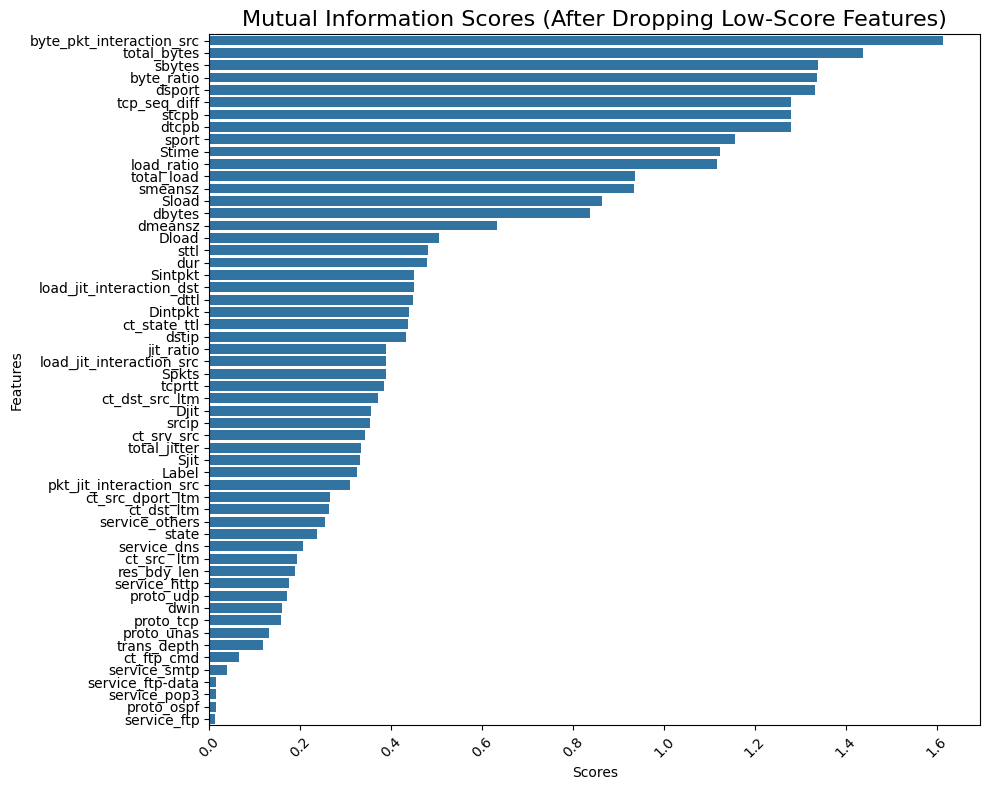

In [137]:
# Plot MI scores after dropping low-score features
plt.figure(figsize=(10, 8))
sns.barplot(x='Scores', y='Features', data=mi_scores[~mi_scores['Features'].isin(low_score_feature_names)])
plt.title("Mutual Information Scores (After Dropping Low-Score Features)", fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Feature Scaling**
---

In [138]:
scaler = StandardScaler()

In [139]:
x_scaled = scaler.fit_transform(x)

# **Checking Variance captured by features**
---

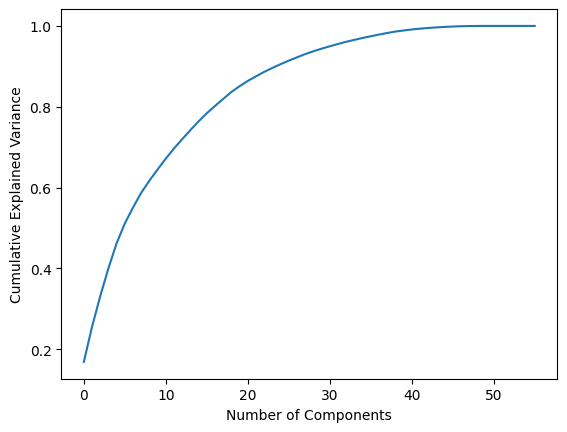

In [140]:
pca = PCA()
pca.fit(x_scaled) 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


1. Rapid Increase Initially: The curve increases sharply for the first few components, indicating that the first few principal components explain a large portion of the variance in the data. This suggests that much of the information (variance) in the original dataset can be captured with just a few components.

2. Plateauing Effect: After a certain point (around 20–25 components), the curve starts to flatten, indicating that adding more components contributes less and less to the explained variance. This suggests that these additional components are capturing only minor details or noise rather than significant patterns.

3. Choosing Number of Components: To balance dimensionality reduction and information retention, you could select a number of components that captures, say, 90-95% of the cumulative explained variance. In this graph, that would correspond to around 20-30 components, depending on the exact threshold we can choose.

# **Dividing in train and test dataframes**
---

In [141]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [142]:
# Ensuring y_train and y_test are 1D arrays
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [143]:
# Arrays to DataFrames and save as CSV
pd.DataFrame(x_train_scaled).to_csv('./DATASET/EDA-DATASET/x_train_scaled.csv', index=False)
pd.DataFrame(x_test_scaled).to_csv('./DATASET/EDA-DATASET/x_test_scaled.csv', index=False)
pd.DataFrame(y_train).to_csv('./DATASET/EDA-DATASET/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('./DATASET/EDA-DATASET/y_test.csv', index=False)